# Pre-trainer Visualization

Visualize the results from the pre-trainer inference on random dataset images.

Start by importing the model builder and building the model with the previously trained weights.

In [35]:
import sys
sys.path.append("../")
from multitudinous.utils.model_builder import build_img_pretraining
import torch

# build the model
model = build_img_pretraining("se_resnet50_unet", "../output/img_pretrainer_19.pth")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

model.eval()

# print the model
print(model)

ResNetUNet(
  (resnet): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): SEBottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

Now we need to import the dataset builder and build the dataset.

In [36]:
from multitudinous.utils.dataset_builder import build_img_dataset
from torch.utils.data import DataLoader

# build the dataset
dataset = build_img_dataset("tum_rgbd", "../../data/tum_rgbd")

# create the dataloader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4)

Now, run inference and visualize on "x" random samples from the dataset.

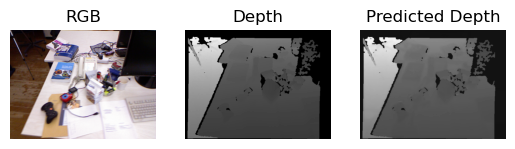

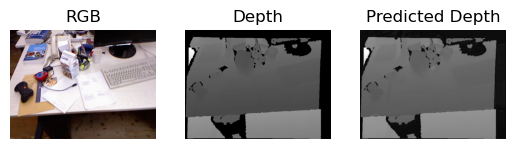

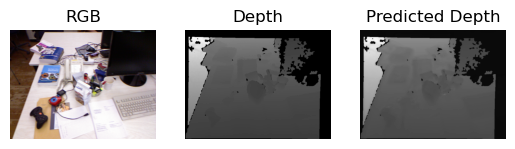

In [37]:
import matplotlib.pyplot as plt
import torch

NUM_SAMPLES = 3

# pick "NUM_SAMPLES" samples
samples = [next(iter(dataloader)) for _ in range(NUM_SAMPLES)]

# run inference on the samples
for rgb, depth in samples:

    pred = None

    # build the rgb-d sample
    rgb = rgb.to(device)
    rgb = rgb.squeeze(0)
    depth = depth.to(device)
    rgbd = torch.cat((rgb, depth), dim=0)
    
    # run inference
    with torch.no_grad():
        # move the sample to the device
        pred = model(rgbd.unsqueeze(0))

    # plot the results
    plt.subplot(1, 3, 1)
    plt.imshow(rgb.permute(1, 2, 0).cpu())
    plt.title("RGB")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(depth.squeeze(0).cpu(), cmap="gray")
    plt.title("Depth")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(pred.squeeze().detach().cpu(), cmap="gray")
    plt.title("Predicted Depth")
    plt.axis("off")
    plt.show()

    del pred